# 臉部關鍵點偵測 (dlib)

什麼是臉部關鍵點(facial landmarks)?

檢測臉部關鍵點是形狀預測(shape prediction)問題的一個子集。給定一個輸入圖像, 通常是感興趣對象的ROI(Region of Interest)，形狀預測器(shape preditor)將嘗試沿著形狀定位感興趣的關鍵點(landmarks)。

![dlib-facial-landmarks](https://www.pyimagesearch.com/wp-content/uploads/2017/04/facial_landmarks_dlib_example.jpg)

## 介紹

>dlib是一套包含了機器學習、計算機視覺、圖像處理等的函式庫，使用C++開發而成，目前廣泛使用於工業及學術界，也應用在機器人、嵌入式系統、手機、甚至於大型的運算架構中，而且最重要的是，它不但開源且完全免費，而且可跨平台使用（Linux、Mac OS、Windows），並且除了C++之外還提供了Python API ，因此如果我們想要建立一套人臉偵測系統，dlib也是相當適合的平台。

>開發者是Davis King，您可以到他的網站 http://blog.dlib.net 看看他如何使用dlib。

以上介紹出自[CH.Tseng](https://chtseng.wordpress.com/2016/12/23/dlib-%E5%A5%BD%E7%94%A8%E7%9A%84%E7%9A%84machine-learning%E5%B7%A5%E5%85%B7-%E4%B8%80/)



### 需求

- [Python 3.5](https://www.python.org/)
- [Anaconda](https://anaconda.org/)
- [Pillow](https://opencv.org/)
- [dlib](http://blog.dlib.net/)

### 安裝
dlib在Windows的安裝不是非常容易, 經過多方試驗之後, 我發現最容易的方法還是透過Anaconda。
強烈建議使用Windows的朋友使用Anandoa。如果有安裝問題的朋友可能得上網找尋相關的症狀來解決。

1. 安裝Anaconda
2. 產生一個Anaconda環境
3. 安裝函式庫:
    
```
conda install -c conda-forge matplotlib 
conda install -c anaconda pillow
conda install -c conda-forge dlib
conda install -c conda-forge opencv
```

### 下載測試用圖像
1. 下載 [donald_trump圖像](http://www.abc.net.au/news/image/8356018-3x2-940x627.jpg) 到'data/'的子目錄中並命名為`donald_trump.jpg`。

### 下載檢測模型檔
1. 下載 [dlib 臉部關鍵點偵測模型](http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2), 並解壓縮到'model/'的子目錄中

### 專案的檔案路徑佈局
   
你的目錄結構看起來像這樣: (這裡只列出來在這個範例會用到的相關檔案與目錄)
```
dlib-facial-landmarks/
├── xxxx.ipynb
├── model/
│   └── shape_predictor_68_face_landmarks.dat
└── data/
    └── donald_trump.jpg

```

檢測臉部關鍵點主要有兩個主要步驟：
* 步驟1：定位圖像中的臉部邊界框。
* 步驟2：檢測臉部ROI上的關鍵臉部結構。

人臉檢測（步驟1）可以通過多種方式實現:
* [OpenCV (Haar特徵分類器)](https://github.com/erhwenkuo/deep-learning-with-keras-notebooks/blob/master/7.0-opencv-face-detection.ipynb)
* [MTCNN (Multi-task Cascaded Convolutional Networks)](https://github.com/erhwenkuo/deep-learning-with-keras-notebooks/blob/master/7.1-mtcnn-face-detection.ipynb)

在這個文章中, 我們將使用`dlib`自帶的face detector來進行人臉檢測:

### 載入相關函式庫

In [1]:
# 把一些警告的訊息暫時関掉
import warnings
warnings.filterwarnings('ignore')

# Utilities相關函式庫
import os
import numpy as np

# 圖像處理/展現的相關函式庫
import dlib
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt

### 設定相關設定與參數

In [2]:
# 專案的根目錄路徑
ROOT_DIR = os.getcwd()

# 訓練/驗證用的資料目錄
DATA_PATH = os.path.join(ROOT_DIR, "data")

# 模型資料目錄
MODEL_PATH = os.path.join(ROOT_DIR, "model")

MODEL_FILE_PATH = os.path.join(MODEL_PATH, "shape_predictor_68_face_landmarks.dat")

# 測試用圖像
TEST_IMAGE = os.path.join(DATA_PATH, "demo.jpg")

## 步驟1：定位圖像中的臉部邊界框

In [3]:
# 使用dlib自帶的frontal_face_detector作為我們的人臉偵測器
face_detector = dlib.get_frontal_face_detector()

# 載入圖像檔
image = Image.open(TEST_IMAGE)

# 把PIL.Image的物作轉換成numpy ndarray
img = np.array(image)

In [4]:
# 使用檢測器進行人臉檢測dets為返回的結果
# 第二個參數中的1表示把原始圖像變大，讓演算法能夠發現更多的人臉。
dets = face_detector(img, 0) # 因為測試的圖像己經很大了, 因此我們不啟動upsampling

# dets的元素個數即為偵測到臉的個數
print("Number of faces detected: {}".format(len(dets)))

Number of faces detected: 1


Detection 0: Left: 161 Top: 66 Right: 376 Bottom: 281


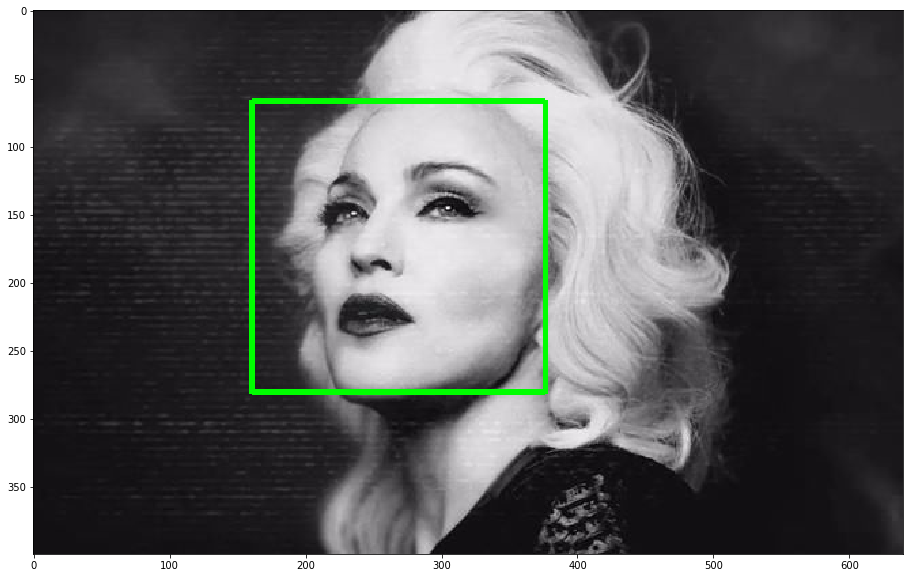

In [5]:
# 複製原始圖像
image_copy = image.copy()

# 在image_copy圖像上繪圖
img_draw = ImageDraw.Draw(image_copy)

# 迭代每一個偵測出來的邊界框
# left：人臉左邊距離圖片左邊界的距離; right：人臉右邊距離圖片左邊界的距離
# top：人臉上邊距離圖片上邊界的距離; bottom：人臉下邊距離圖片上邊界的距離
for i, d in enumerate(dets):
    x1 = d.left()
    y1 = d.top()
    x2 = d.right()
    y2 = d.bottom()
    
    print("Detection {}: Left: {} Top: {} Right: {} Bottom: {}"
        .format( i, d.left(), d.top(), d.right(), d.bottom()))
    
    # 透過畫線來畫一個四方框的框線並控制粗細
    img_draw.line([(x1,y1),(x2,y1),(x2,y2),(x1,y2),(x1,y1)], fill='#00FF00', width=4)
    
plt.figure(figsize=(20,10))
plt.imshow(image_copy); plt.show()

## 步驟2：檢測臉部ROI上的關鍵臉部結構

現在有許多的演算法可以用來偵測臉部關鍵點，但所有的方法在本質上都是試圖要找出每個關鍵點的座標：
* 口 (Mouth)
* 右眉 (Right eyebrow)
* 左眉 (Left eyebrow)
* 右眼 (Right eye)
* 左眼 (Left eye)
* 鼻子 (Nose)
* 顎 (Jaw)

包含在dlib函式庫中的臉部關鍵點偵測檢測器是由Kazemi和Sullivan（2014）論文:[One Millisecond Face Alignment with an Ensemble of Regression Trees](https://pdfs.semanticscholar.org/d78b/6a5b0dcaa81b1faea5fb0000045a62513567.pdf)演算法的實現。

這篇論文提出一個基於梯度提升(gradient boosting)的回歸樹的集合(an ensemble of regression tress)來精準預測人臉的關鍵點偵測。它不僅在精準度很好以外, 重要的是這個演算法的運算速度非常的快。

### 了解dlib的臉部關鍵點檢測器

dlib函式庫中的預先訓練好的臉部關鍵點檢測器可以用來估計映射到面部上的68個臉部關鍵點（x，y）坐標的位置。

我們可以在下面的圖片中看到68個坐標的索引值：

![facial-lanmark-index](https://www.pyimagesearch.com/wp-content/uploads/2017/04/facial_landmarks_68markup-768x619.jpg)

這些68點的註釋是dlib的臉部關鍵點檢測器用來訓練的[iBUG 300-W](https://ibug.doc.ic.ac.uk/resources/facial-point-annotations/)數據集的一部分。

無論使用哪個數據集，都可以使用相同的dlib框架來訓練輸入訓練數據上的形狀預測器 - 如果您想要訓練臉部關鍵點檢測器或自定義形狀預測器，這都非常有用。

In [6]:
# 將dlib偵測到的人臉68個特徵點取出
def shape_to_np(shape, dtype="int"):
    # initialize the list of (x, y)-coordinates
    coords = np.zeros((68, 2), dtype=dtype)
 
    # loop over the 68 facial landmarks and convert them
    # to a 2-tuple of (x, y)-coordinates
    for i in range(0, 68):
        coords[i] = (shape.part(i).x, shape.part(i).y)
 
    # return the list of (x, y)-coordinates
    return coords

# 偵測單一人臉的臉部特徵
def get_landmarks(im, face_detector, shape_predictor):
    rects = face_detector(im, 1)
    shape = shape_predictor(im, rects[0])
    coords = shape_to_np(shape, dtype="int")
        
    return coords

### 人臉關鍵點提取

In [7]:
# 模型權重檔路徑
predictor_path = MODEL_FILE_PATH

# 構建特徵提取器'shape_predictor'
shape_predictor = dlib.shape_predictor(predictor_path)

In [8]:
# 複製原始圖像
image_copy2 = image.copy()

# 在image_copy圖像上繪圖
img_draw = ImageDraw.Draw(image_copy2)

# 取得68個人臉關鍵點的座標
landmarks = get_landmarks(img,face_detector, shape_predictor)

#顎 (Jaw: 17 points) 1 ~ 17
jaw = landmarks[0:17]

#左眉 (Left eyebrow: 5 points)  18 ~ 22
left_eyebrow = landmarks[17:22]

#右眉 (Right eyebrow: 5 points)  23 ~ 27
right_eyebrow = landmarks[22:27]

#鼻子 (Nose: 9 points) 28 ~ 31 , 32 ~ 36
vertical_nose = landmarks[27:31]
horizontal_nose = landmarks[31:36]

#左眼 (Left eye: 6 points)  37 ~ 42
left_eye = landmarks[36:42]

#右眼 (Right eye: 6 points)  43 ~ 48
right_eye = landmarks[42:48]

#口 (Mouth: 20 points) 49 ~ 68
mouth = landmarks[48:68]

### 視覺化人臉關鍵點

依據面部上的68個臉部關鍵點（x，y）坐標索引值與所代表的人臉區段來繪圖(連連看)。
為了讓大家能夠掌握每一個關鍵點的位置與區域, 特定一段一段地進行連線的繪製。有關Pillow的函式庫的詳細解說, 請參考: [0.2-image-processing-pillow](https://github.com/erhwenkuo/deep-learning-with-keras-notebooks/blob/master/0.2-image-processing-pillow.ipynb)

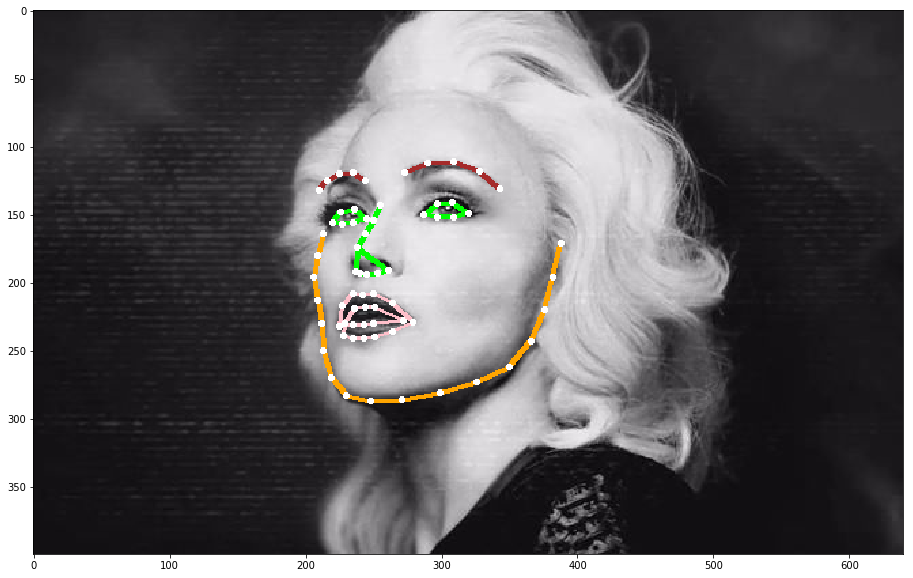

In [9]:
# 複製原始圖像
image_copy2 = image.copy()
# 在image_copy圖像上繪圖
img_draw = ImageDraw.Draw(image_copy2)
# 畫出 - 顎 (Jaw: 17 points) 1 ~ 17
img_draw.line(jaw.flatten().tolist(), fill='orange', width=4)
# 畫出 - 左眉 (Left eyebrow: 5 points)  18 ~ 22
img_draw.line(left_eyebrow.flatten().tolist(), fill='brown', width=4)
# 畫出 - 右眉 (Right eyebrow: 5 points)  23 ~ 27
img_draw.line(right_eyebrow.flatten().tolist(), fill='brown', width=4)
# 畫出 - 鼻子 (Nose: 9 points) 28 ~ 31 , 32 ~ 36
img_draw.line(vertical_nose.flatten().tolist(), fill='#00FF00', width=4)
img_draw.line(horizontal_nose.flatten().tolist(), fill='#00FF00', width=4)
img_draw.line(np.take(landmarks,[30,31],0).flatten().tolist(), fill='#00FF00', width=4)
img_draw.line(np.take(landmarks,[30,35],0).flatten().tolist(), fill='#00FF00', width=4)
# 畫出 - 左眼 (Left eye: 6 points)  37 ~ 42
img_draw.line(np.take(landmarks,[36,37,38,39,40,41,36],0).flatten().tolist(), fill='#00FF00', width=4)
# 畫出 - 右眼 (Right eye: 6 points)  43 ~ 48
img_draw.line(np.take(landmarks,[42,43,44,45,46,47,42],0).flatten().tolist(), fill='#00FF00', width=4)
# 畫出 - 口 (Mouth: 20 points) 49 ~ 68
img_draw.line(mouth.flatten().tolist(), fill='pink', width=3)
img_draw.line(np.take(landmarks,[60,67],0).flatten().tolist(), fill='pink', width=4)
# 畫出 - 68個點的facial landmarks

# 在PIL要畫一個可以控制大小的圖要透過以下的手法
r = 2 # 設定半徑

# 迭代出每一個點(x,y)
for i in range(landmarks.shape[0]):
    (x,y) = landmarks[i,:]
    # 以圖的中心點(x,y)來計算框住圓的邊界框座標[(x1,y1),(x2,y2)]
    img_draw.ellipse((x-r,y-r, x+r, y+r), fill='white') 

plt.figure(figsize=(20,10))
plt.imshow(image_copy2); plt.show()

參考:
* [Facial landmarks with dlib, OpenCV, and Python](https://www.pyimagesearch.com/2017/04/03/facial-landmarks-dlib-opencv-python/)
